# #2020Census

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
frames = []
for m in range(1,6):
    temp_df = pd.read_csv(f"data/2020/hashtag_census_tweets_month_{m}.csv",parse_dates=["date"])
    frames.append(temp_df)

In [3]:
df = pd.concat(frames).sort_values(by=['date'])
df.reset_index(inplace = True)
print(df.shape)
df.head()

(123155, 12)


,index,id,timestamp,username,text,hashtags,geo,retweets,favorites,mentions,to,date
0,10143,1.212480e+18,2020-01-01 21:05:29+00:00,CountTheNation,$800 BILLION WHO!? WHAT!? The more people cou...,#ThisisUS #StandUpBeCounted #2020Census #Every...,NaN,0,2,@ColorOfChange @NALEO @uscensusbureau,NaN,2020-01-01
1,10162,1.212449e+18,2020-01-01 19:00:56+00:00,WakeGOV,#HappyNewYear! The #2020Census is closer than ...,#HappyNewYear #2020Census #Census101 #WakeCounts,NaN,2,3,NaN,NaN,2020-01-01
2,10163,1.212448e+18,2020-01-01 19:00:02+00:00,CAPOrangeCounty,¡Es oficialmente el 2020! ¡Su primer meta del ...,#CENSO2020 #CENSO2020 #OCCuenta2020 #NewYear #...,NaN,2,1,NaN,NaN,2020-01-01
3,10164,1.212448e+18,2020-01-01 18:59:48+00:00,AlabamaCounts,The #2020Census is almost here. We are ready f...,#2020Census,NaN,3,1,NaN,uscensusbureau,2020-01-01
4,10165,1.212446e+18,2020-01-01 18:51:59+00:00,JeffWice,NY projected to lose 1 congressional district ...,#2020Census,NaN,2,2,@mandy_fries @timesunion @NYLawSchool @NYElect...,NaN,2020-01-01


## Tweets per day

In [4]:
grouped = df.groupby("date")

In [5]:
df_grouped=pd.DataFrame({"tweets": grouped["id"].count(),"unique_users": grouped["username"].nunique()})
df_grouped

,tweets,unique_users
date,,
2020-01-01,117,108
2020-01-02,188,178
2020-01-03,180,155
2020-01-04,111,83
2020-01-05,72,67
...,...,...
2020-05-11,746,607
2020-05-12,865,745
2020-05-13,981,809


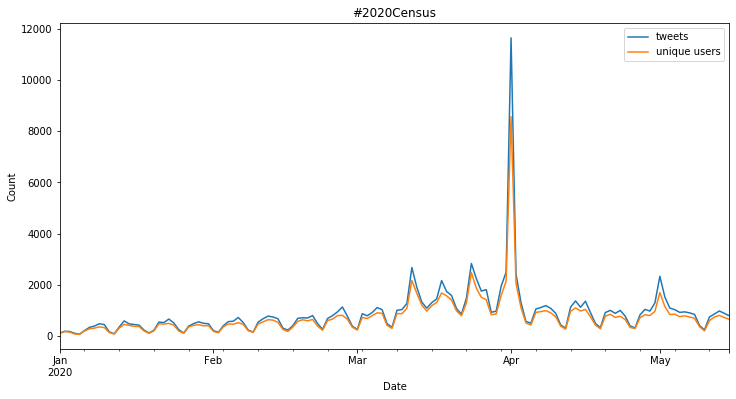

In [6]:
fig, ax = plt.subplots(1,1,figsize=(12,6))

df_grouped.tweets.plot(style='-', label="tweets",ax=ax)
df_grouped.unique_users.plot(style="-",label="unique users",ax=ax)

ax.set_xlabel("Date")
ax.set_ylabel("Count")

ax.set_title("#2020Census")
plt.legend();

Days with more tweets:

In [7]:
df_grouped.sort_values(["tweets"], ascending=False)["tweets"].iloc[:5]

date
2020-04-01    11647
2020-03-24     2835
2020-03-12     2677
2020-03-31     2495
2020-04-02     2422
Name: tweets, dtype: int64

## Tweets per month

In [8]:
grouped_m = df.groupby(df['date'].dt.strftime('%m'))
df_grouped_m =pd.DataFrame({"tweets": grouped_m["id"].count(),"unique_users": grouped_m["username"].nunique()})
df_grouped_m

,tweets,unique_users
date,,
01,10730,5016
02,16334,7403
03,42805,22632
04,38742,18209
05,14544,6679


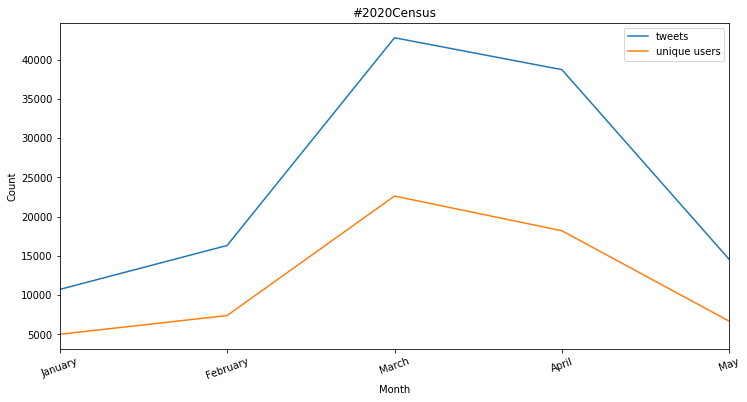

In [9]:
import calendar
fig, ax = plt.subplots(1,1,figsize=(12,6))

df_grouped_m.tweets.plot(style='-', label="tweets",ax=ax)
df_grouped_m.unique_users.plot(style="-",label="unique users",ax=ax)

ax.set_xlabel("Month")
ax.set_ylabel("Count")

ax.set_title("#2020Census")
plt.xticks(np.arange(5), calendar.month_name[1:6], rotation=20)
plt.legend();

## Most active users

In [10]:
grouped_u = df.groupby(df['username'])
df_grouped_u =pd.DataFrame({"tweets": grouped_u["id"].count(),"days": grouped_u["date"].nunique()})
df_grouped_u.sort_values(by=["tweets"],ascending=False)[:20]

,tweets,days
username,,
hansilowang,773,103
KansasCounts,275,90
uscensusbureau,259,109
CTCounts2020,231,103
SDIDEC,218,98
LawyersComm,212,71
TrueNorth_CS,209,111
ABNYCensus2020,199,74
CWENYC,192,84


### @hansilowang tweets

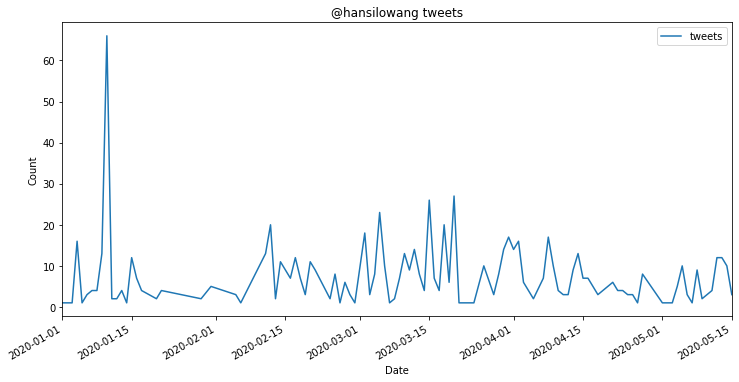

In [11]:
hw_grouped = df[df.username=="hansilowang"].groupby("date")
hw_grouped =pd.DataFrame({"tweets": hw_grouped["id"].count()})

fig, ax = plt.subplots(1,1,figsize=(12,6))

hw_grouped.tweets.plot(style='-', label="tweets",ax=ax)

ax.set_xlabel("Date")
ax.set_ylabel("Count")

ax.set_title("@hansilowang tweets")
plt.legend();

## Shared census urls

In [12]:
df[df.text.str.contains("https")].text

0          $800 BILLION WHO!? WHAT!? The more people cou...
8         #Arizona is almost certain to gain a congressi...
12        RT ALALibrary "Rural communities are among the...
13        California: Gee- I wonder how come we might lo...
14        Happy New Year! Resolve to shape your future t...
                                ...                        
123144    #Census2020 is here! Respond promptly to: (i) ...
123147    Have you completed the Census? It takes 10 min...
123148    Here's some more Nebraska #2020Census data fro...
123151    Ayude a las escuelas de nuestras comunidades c...
123154    No matter where or what you call home, the #20...
Name: text, Length: 24410, dtype: object

In [47]:
df_urls = df[df.text.str.contains("https")][["date","text"]]
df_urls.reset_index(inplace=True)

In [48]:
from pyspark.sql import SparkSession
import re

spark= SparkSession.builder.getOrCreate()

rdd = spark.createDataFrame(df_urls).rdd
print(type(rdd))

<class 'pyspark.rdd.RDD'>


In [49]:
regex_val = 'https[^ ]+'

data = rdd.map(lambda x: (x.date, re.findall(regex_val, x.text) )).flatMapValues(lambda x: x)\
.map(lambda x: (x[0], x[1].rstrip("/").rstrip(".").rstrip(",").rstrip(";").rstrip("/")     ) )\
.map(lambda x: ( x[1], [x[0].date()] )).reduceByKey(lambda x,y: x+y ).map(lambda x: (x[0],len(x[1]),x[1]  ))

data.take(2)

[('https://tinyurl.com/vyv9jh2', 1, [datetime.date(2020, 1, 1)]),
 ('https://bit.ly/2ZPOJqN', 1, [datetime.date(2020, 1, 1)])]

In [50]:
df_urls = data.toDF().toPandas()
df_urls.columns = ["url","count","dates"]
df_urls.sort_values(by="count",ascending=False,inplace=True)
df_urls.iloc[:50]

,url,count,dates
8665,https://my2020census.gov,2925,"[2020-03-03, 2020-03-06, 2020-03-06, 2020-03-1..."
3282,https://2020census.gov,1759,"[2020-01-03, 2020-01-08, 2020-01-14, 2020-01-1..."
8261,https://2020census.gov/en.html,374,"[2020-01-15, 2020-01-22, 2020-01-23, 2020-01-2..."
3734,https://2020census.gov/en/response-rates.html,270,"[2020-02-28, 2020-03-06, 2020-03-09, 2020-03-1..."
1647,https://www.2020census.gov,170,"[2020-01-02, 2020-01-06, 2020-01-13, 2020-01-1..."
6620,https://2020census.gov/en/ways-to-respond.html,164,"[2020-01-16, 2020-01-21, 2020-02-08, 2020-02-1..."
8190,https://2020census.gov/en/jobs.html,138,"[2020-01-02, 2020-01-06, 2020-01-07, 2020-01-0..."
6619,https://buff.ly/2HS74x5,122,"[2020-01-16, 2020-01-22, 2020-01-23, 2020-01-2..."
9789,https://www.census.gov,91,"[2020-01-08, 2020-01-08, 2020-01-22, 2020-01-2..."
11532,https://census.lacounty.gov/census,87,"[2020-01-29, 2020-01-30, 2020-02-01, 2020-02-0..."


## Mentions network

In [51]:
df_mentions = df[df.mentions.notnull()][["username","mentions","date"]]
df_mentions

,username,mentions,date
0,CountTheNation,@ColorOfChange @NALEO @uscensusbureau,2020-01-01
4,JeffWice,@mandy_fries @timesunion @NYLawSchool @NYElect...,2020-01-01
5,JulieMenin,@1kathleendaniel,2020-01-01
8,BridgetDowdKJZZ,@kjzzphoenix,2020-01-01
15,TrueNorth_CS,@uscensusbureau,2020-01-01
...,...,...,...
123121,FTLCityNews,@uscensusbureau @BrowardCensus,2020-05-15
123130,Ready_Nation,@PRBdata,2020-05-15
123142,sacramentolabor,@SacLFCC,2020-05-15
123143,DavidVanceDC,@danvicuna @CommonCause @KMaxGreenwood @thehill,2020-05-15


In [52]:
rdd = spark.createDataFrame(df_mentions).rdd

In [53]:
data = rdd.map(lambda x: ( ("@"+x.username, x.date.date()) ,x.mentions.split(" ")) ).flatMapValues(lambda x: x)\
.map(lambda x: (x[0][0],x[1],x[0][1]))

data.take(5)

[('@CountTheNation', '@ColorOfChange', datetime.date(2020, 1, 1)),
 ('@CountTheNation', '@NALEO', datetime.date(2020, 1, 1)),
 ('@CountTheNation', '@uscensusbureau', datetime.date(2020, 1, 1)),
 ('@JeffWice', '@mandy_fries', datetime.date(2020, 1, 1)),
 ('@JeffWice', '@timesunion', datetime.date(2020, 1, 1))]

In [87]:
import networkx as nx

G = nx.Graph()
D = nx.DiGraph()
for i in data.collect():
    G.add_edge(i[0], i[1])
    D.add_edge(i[0], i[1])

In [88]:
print("Number of nodes:", len(G.nodes()))
print("Number of edges:", len(G.edges()))

Number of nodes: 27346
Number of edges: 39641


In [89]:
components = list(nx.connected_components(G))

In [90]:
print("Number of connected components:",len(components))
print("Largest components:")
sorted([len(x) for x in components],reverse=True)[:10]

Number of connected components: 1727
Largest components:


[22789, 24, 23, 20, 18, 17, 16, 13, 11, 11]

In [93]:
out_degree = {k: v for k, v in sorted(dict(D.out_degree()).items(), reverse=True , key=lambda item: item[1])}
in_degree = {k: v for k, v in sorted(dict(D.in_degree()).items(), reverse=True , key=lambda item: item[1])}

In [99]:
print("Nodes with more edges going out:\n",{x: out_degree[x] for x  in  list(out_degree)[:10] } )
print("\nNodes with more edges going in:\n",{x: in_degree[x] for x  in  list(in_degree)[:10] } )

Nodes with more edges going out:
 {'@hansilowang': 147, '@JeffWice': 122, '@JuanRosa_NYC': 111, '@ABNYCensus2020': 100, '@CommBovo': 97, '@LawyersComm': 89, '@JulieMenin': 88, '@Census2020Map': 83, '@WeCountWeRise': 82, '@MontseTXAFLCIO': 77}

Nodes with more edges going in:
 {'@uscensusbureau': 4564, '@NALEO': 278, '@CACensus': 247, '@YouTube': 245, '@realDonaldTrump': 202, '@sesamestreet': 193, '@CACompleteCount': 187, '@staceyabrams': 180, '@hansilowang': 133, '@AOC': 119}


### DFS trees

In [125]:
def Search(graph, root):
    """Runs Search from vertex root in a graph. Neighboring nodes are processed in alphabetical order.
    
    Args:
        graph: the given graph, with nodes encoded as strings.
        root: the node from which to start the search.
        
    Returns:
        A list of nodes in the order in which they were first visited.
    """
    # Initialize the list of visited paths that will be returned
    visited_path = []
    
    # visited_nodes is a record of all the nodes that have been visited. All of them are set to false.
    visited_nodes = {}
    for n in graph.nodes():
        visited_nodes[n] = False

    # search all the neighbors of the root node
    Search_neighbours(graph,root,visited_nodes,visited_path)
   
    return visited_path

def Search_neighbours(graph_var,node,visited_nodes_var,visited_path_var):
    """ Visit all neighbours from the node if they have not been visited before.
    When visiting a new node, it is marked as visited and added to the path.
    
    Args:
        graph_var: the given graph, with nodes encoded as strings.
        node: the node from which to start the search.
        visited_nodes_var: A dict of all the nodes. Every entry is true or false depending if it is visited.
        visited_path_var: List of visited nodes. I has to be updated.
    """
    
    # Visit current node
    visited_nodes_var[node] = True
    # Add node to the path
    #visited_path_var.append(node)
    
    # Visit in order every neighbour of the node
    for e in sorted(graph_var.neighbors(node)):
        # If it is not visited, visit the neighbour
        if not visited_nodes_var[e] :
            visited_path_var.append([node,e])
            Search_neighbours(graph_var,e,visited_nodes_var,visited_path_var)

In [126]:
for i in list(out_degree)[:10] :
    tree = Search(D,i)
    print(i,"tree length:",len(tree))

@hansilowang tree length: 5262
@JeffWice tree length: 5262
@JuanRosa_NYC tree length: 5262
@ABNYCensus2020 tree length: 5262
@CommBovo tree length: 5262
@LawyersComm tree length: 5262
@JulieMenin tree length: 5262
@Census2020Map tree length: 5262
@WeCountWeRise tree length: 5262
@MontseTXAFLCIO tree length: 5262


In [115]:
len(list(D.neighbors("@hansilowang")))

147

In [142]:
tree = nx.DiGraph()
path = Search(D,"@hansilowang")

for i in path:
    tree.add_edge(i[0],i[1])

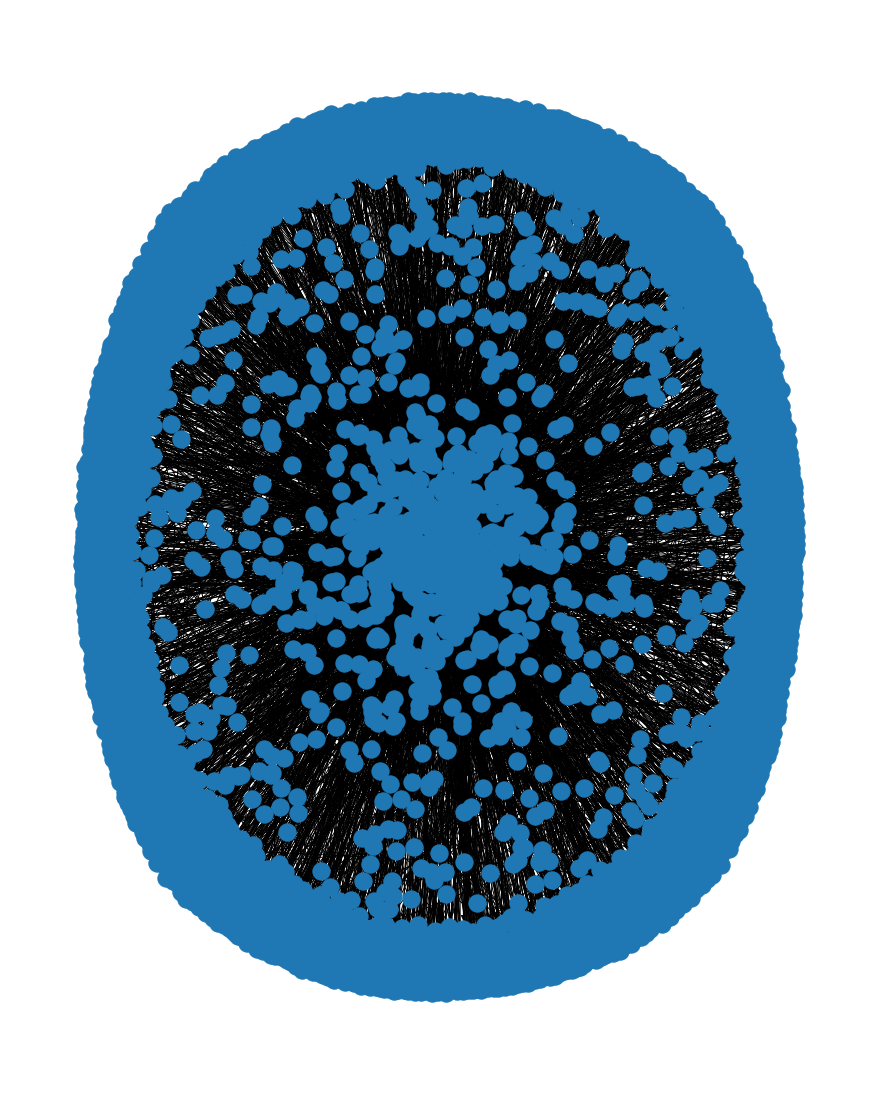

In [143]:
plt.figure(1,figsize=(12,15))
nx.draw(tree)